In [1]:
from datetime import datetime, timedelta

from stock_data_repo import StockDataRepo
from backtest import Backtester, BacktestResult
from strategies import MinVarianceAuxiliaryData, min_variance_portfolio
import numpy as np
import matplotlib.pylab as plt

In [212]:
backtester = Backtester(datetime(2020, 1, 1, 0, 0, 0))

In [228]:
POTENTIAL_LONGS = [
    "GRUB"
]
SHORT_CANDIDATES = [
    "SPY",
    "QQQ",
    "IWF",
    "IWM",
    "VTV",
    "MTUM",
]
r = {}
for long_ticker in POTENTIAL_LONGS:
    print("processing ticker", long_ticker)
    r[long_ticker] = backtester.backtest([long_ticker], SHORT_CANDIDATES, min_variance_portfolio)

processing ticker GRUB
[*********************100%***********************]  1 of 1 completed


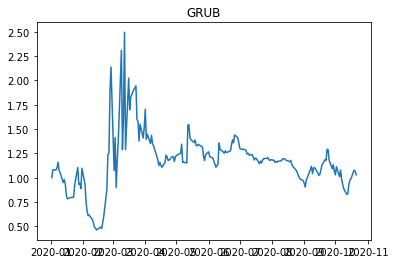

<Figure size 432x288 with 0 Axes>

In [229]:
for ticker, data in r.items():
    cum_returns = (data.returns_history+1).cumprod()
    plt.title(ticker)
    plt.plot(cum_returns)
    plt.figure()

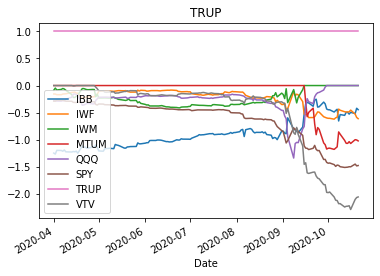

In [207]:
for ticker, data in r.items():
    data.allocation_history.plot(title=ticker)

    

In [5]:
from strategies import min_variance_portfolio

## Does variance minimization strip out alpha?

This example shows that variance minimization will prioritize a lower variance, at the expense of returns.

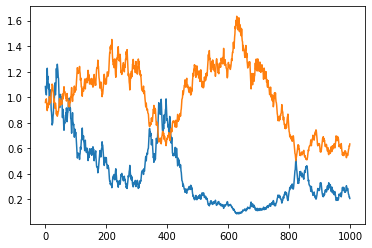

In [66]:
returns_1 = np.random.uniform(-.1, .1, size=1000) # No returns but lower variance.
returns_2 = -1*returns_1/2.0
returns_1 = returns_1 # + .001
returns_2 = returns_2 # - .001
plt.plot(np.cumprod((1+returns_1)))
plt.plot(np.cumprod((1+returns_2)))


In [62]:
import pandas as pd

r = min_variance_portfolio(None, pd.DataFrame({"a": returns_1, "b": returns_2}))
r[0]

OrderedDict([('a', 0.33348), ('b', 0.66652)])

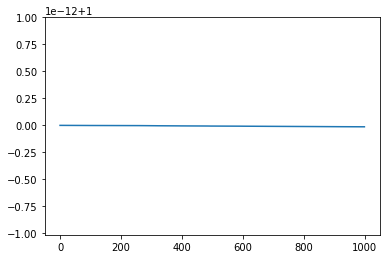

In [67]:
w_1 = r[0]['a']
w_2 = r[0]['b']

w_1 = 1
w_2 = 2


plt.plot(np.cumprod(1+ w_1*returns_1 + w_2*returns_2))